In [45]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import random 

# Load & Filter Dataset

In [3]:
dataset = pd.read_csv('/content/Mall_Customers.xls')

dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dataset.info()
#Obv no null entries were found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#Remove Duplicates
dataset.drop_duplicates(inplace=True)

# Using the elbow method to determine the optimum number of clusters

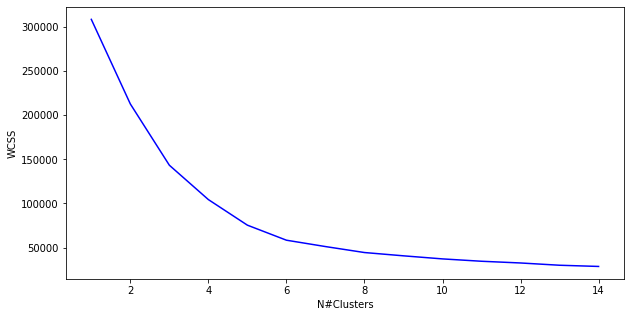

In [25]:
X = dataset.iloc[:,[2,3,4]].values

#Define maximum number of clusters to search through which can be 15

wcss = []
for i in range(1,15):
  algo = KMeans(n_clusters=i,init= 'k-means++', random_state=42)
  algo.fit(X)
  wcss.append(algo.inertia_)


#Plot to determine the optimum value 
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss,color='b')
plt.xlabel('N#Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Elbow at number of clusters = 6

# Algorithm Implementation

In [41]:
#Assume number of clusters = 6
#We are gonna create 6 lists to contain the points that belong to each cluster


num_clusters = 6
points       = [[i,j,k] for i,j,k in X]
random.shuffle(points)

centroids = random.sample(points,num_clusters)


clusters = {i:[] for i in range(0,num_clusters)}

#K means clustering algorithm 
num_changes = 0

#Calculate distance function
distance = lambda p0,p1: np.sqrt((p1[0]-p0[0])**2+(p1[1]-p0[1])**2)

while(True):
	#First assign clusters 
	for point in points:
		cl_id = np.argmin([distance(point,j) for j in centroids])

		if point not in clusters[cl_id]:
			num_changes += 1
			clusters[cl_id].append(point)

	if num_changes == 0:
		break
	num_changes = 0

	#Recalculate centroids 
	for i in range(0,len(centroids)):
		points_mean	 = np.mean(np.array(clusters[i]),axis=0)
		centroids[i] = [points_mean[0],points_mean[1],points_mean[2]]


# Final Plot -- High Dimensional

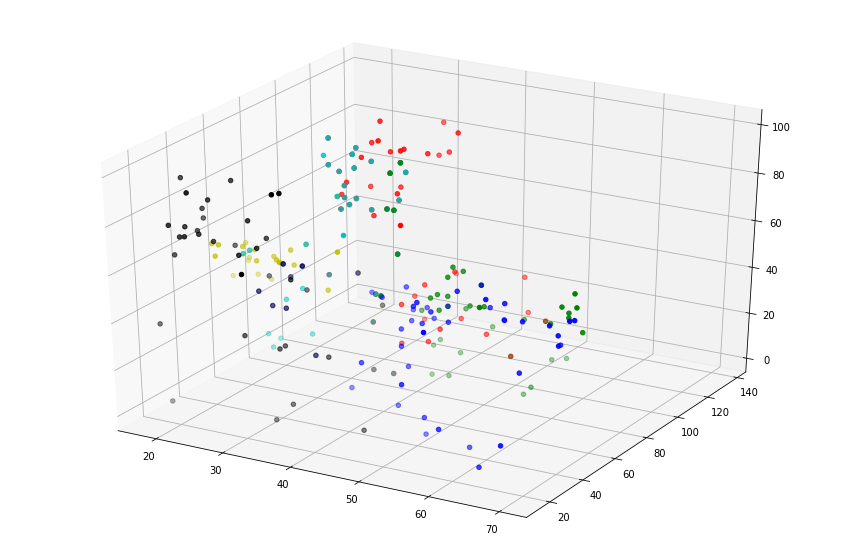

In [77]:
#Flatten the points:

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

colors = ['g','b','r','y','c','k']

for i,key in enumerate(clusters.keys()):
  xs = np.array([i[0] for i in clusters[key]])
  ys = np.array([i[1] for i in clusters[key]])
  zs = np.array([i[2] for i in clusters[key]])

  ax.scatter3D(xs, ys, zs,color=colors[i])
  ax.scatter3D(centroids[i][0],centroids[i][1],centroids[i][2],color=colors[i])